# Oasis Infobyte - Data Science - 
## Batch - December Phase 1 OIBSIP


### Task 3 : Car Price Prediction Using Machine Learning
### credits : Saya Vamshi Krishna

# Problem Statement :

The price of a car depends on a lot of factors like goodwill of the brand of the car, features of the car, horsepower and mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset :

In [205]:
car_df = pd.read_csv('/Users/vamshikrishna33/Documents/Oasis Infobyte Internship/Car_Price_Prediction/car_data.csv')


In [206]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [207]:
#checking the shape of the data
car_df.shape

(301, 9)

### Data Information :

In [231]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


### Data Description :

In [232]:
car_df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


### Data Cleaning and Preparation : 

In [210]:
car_df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [212]:
# checking the distribution of categorical data
print(car_df['Fuel_Type'].value_counts())
print(car_df['Selling_type'].value_counts())
print(car_df['Transmission'].value_counts())
print(car_df['Car_Name'].value_counts())
print(car_df['Year'].value_counts())
print(car_df['Present_Price'].value_counts())
print(car_df['Owner'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64
Present_Price
9.40     14
13.60    13
5.70      8
1.47      7
0.51      6
         ..
36.23     1
18.54     1
7.27      1
15.04     1
12.50     1
Name: count, Length: 148, dtype: 

### Exploratory Data Analysis :

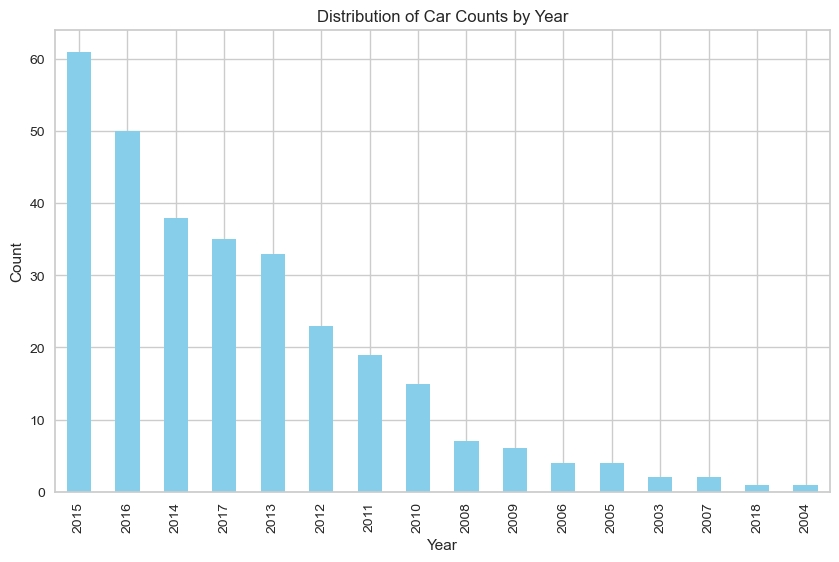

In [233]:
Year_counts = car_df['Year'].value_counts()
plt.figure(figsize=(10, 6))
Year_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Car Counts by Year')
plt.show()


<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

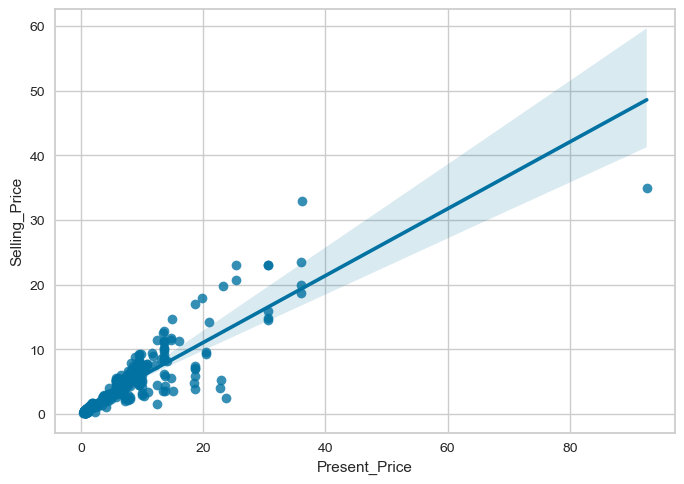

In [234]:
# Creating a regression plot
sns.regplot(x='Present_Price', y='Selling_Price', data=car_df)


Text(0.5, 1.0, 'Car Driven_kms')

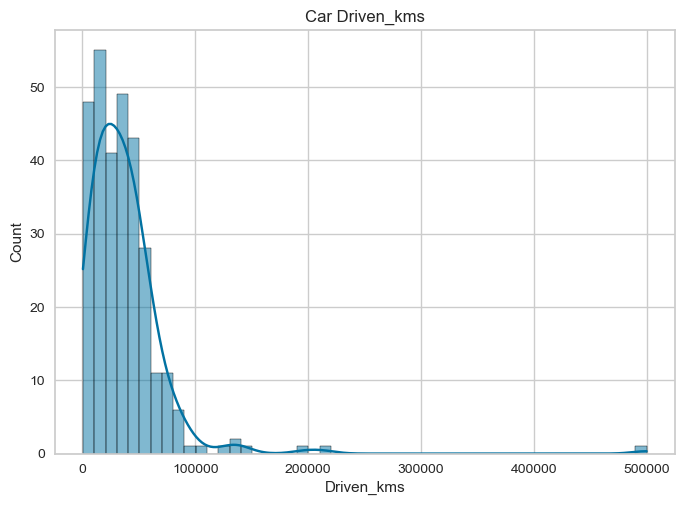

In [235]:
sns.histplot(car_df['Driven_kms'], kde = True)
plt.title('Car Driven_kms')

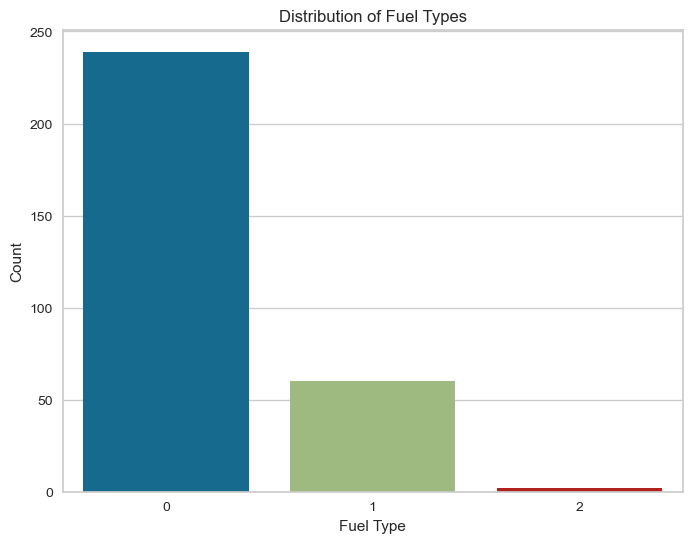

In [236]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel_Type', data=car_df)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

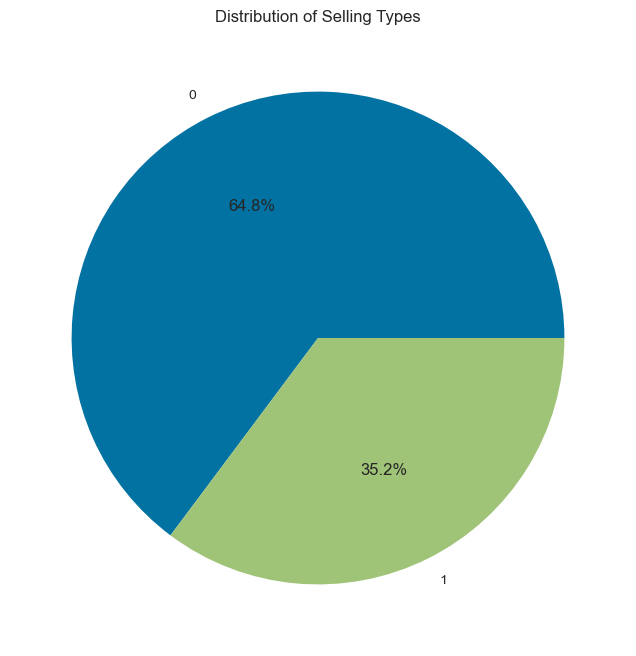

In [237]:
plt.figure(figsize=(8, 8))
selling_type_counts = car_df['Selling_type'].value_counts()
plt.pie(selling_type_counts, labels=selling_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Selling Types')
plt.show()


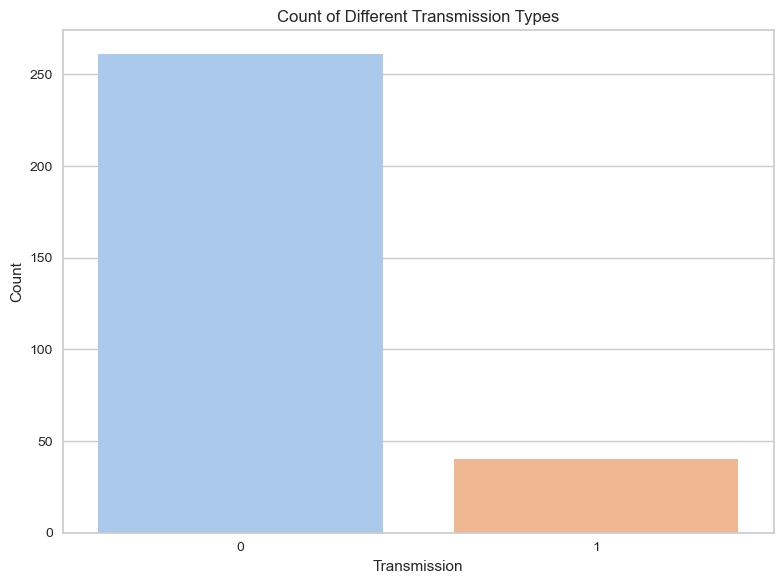

In [238]:
transmission_counts = car_df['Transmission'].value_counts()

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=car_df, x='Transmission', palette='pastel')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Count of Different Transmission Types')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Car Owner ')

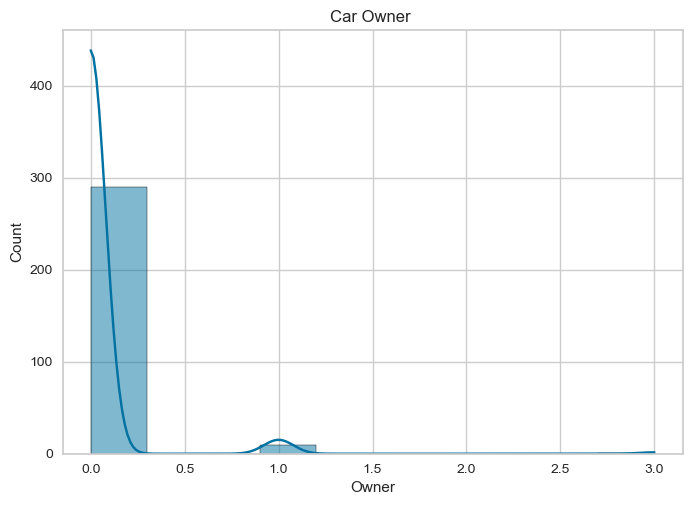

In [239]:
sns.histplot(car_df['Owner'], kde = True)
plt.title('Car Owner ')

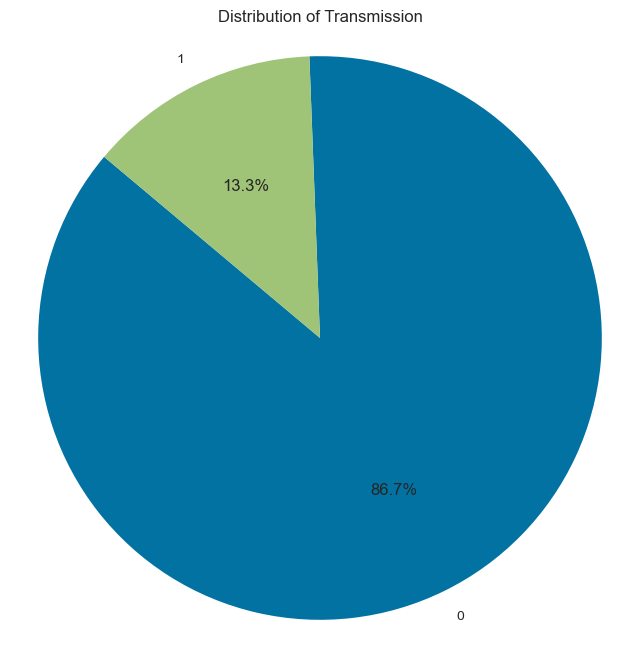

In [240]:
plt.figure(figsize=(8, 8))
symboling_counts = car_df['Transmission'].value_counts()
plt.pie(symboling_counts, labels=symboling_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transmission')
plt.axis('equal')
plt.show()


In [244]:
cars_df = car_df[['Year', 'Selling_Price', 'Present_Price','Driven_kms', 'Fuel_Type','Selling_type',
                  'Transmission', 'Owner']]
 
cars_df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


<Figure size 5000x3800 with 0 Axes>

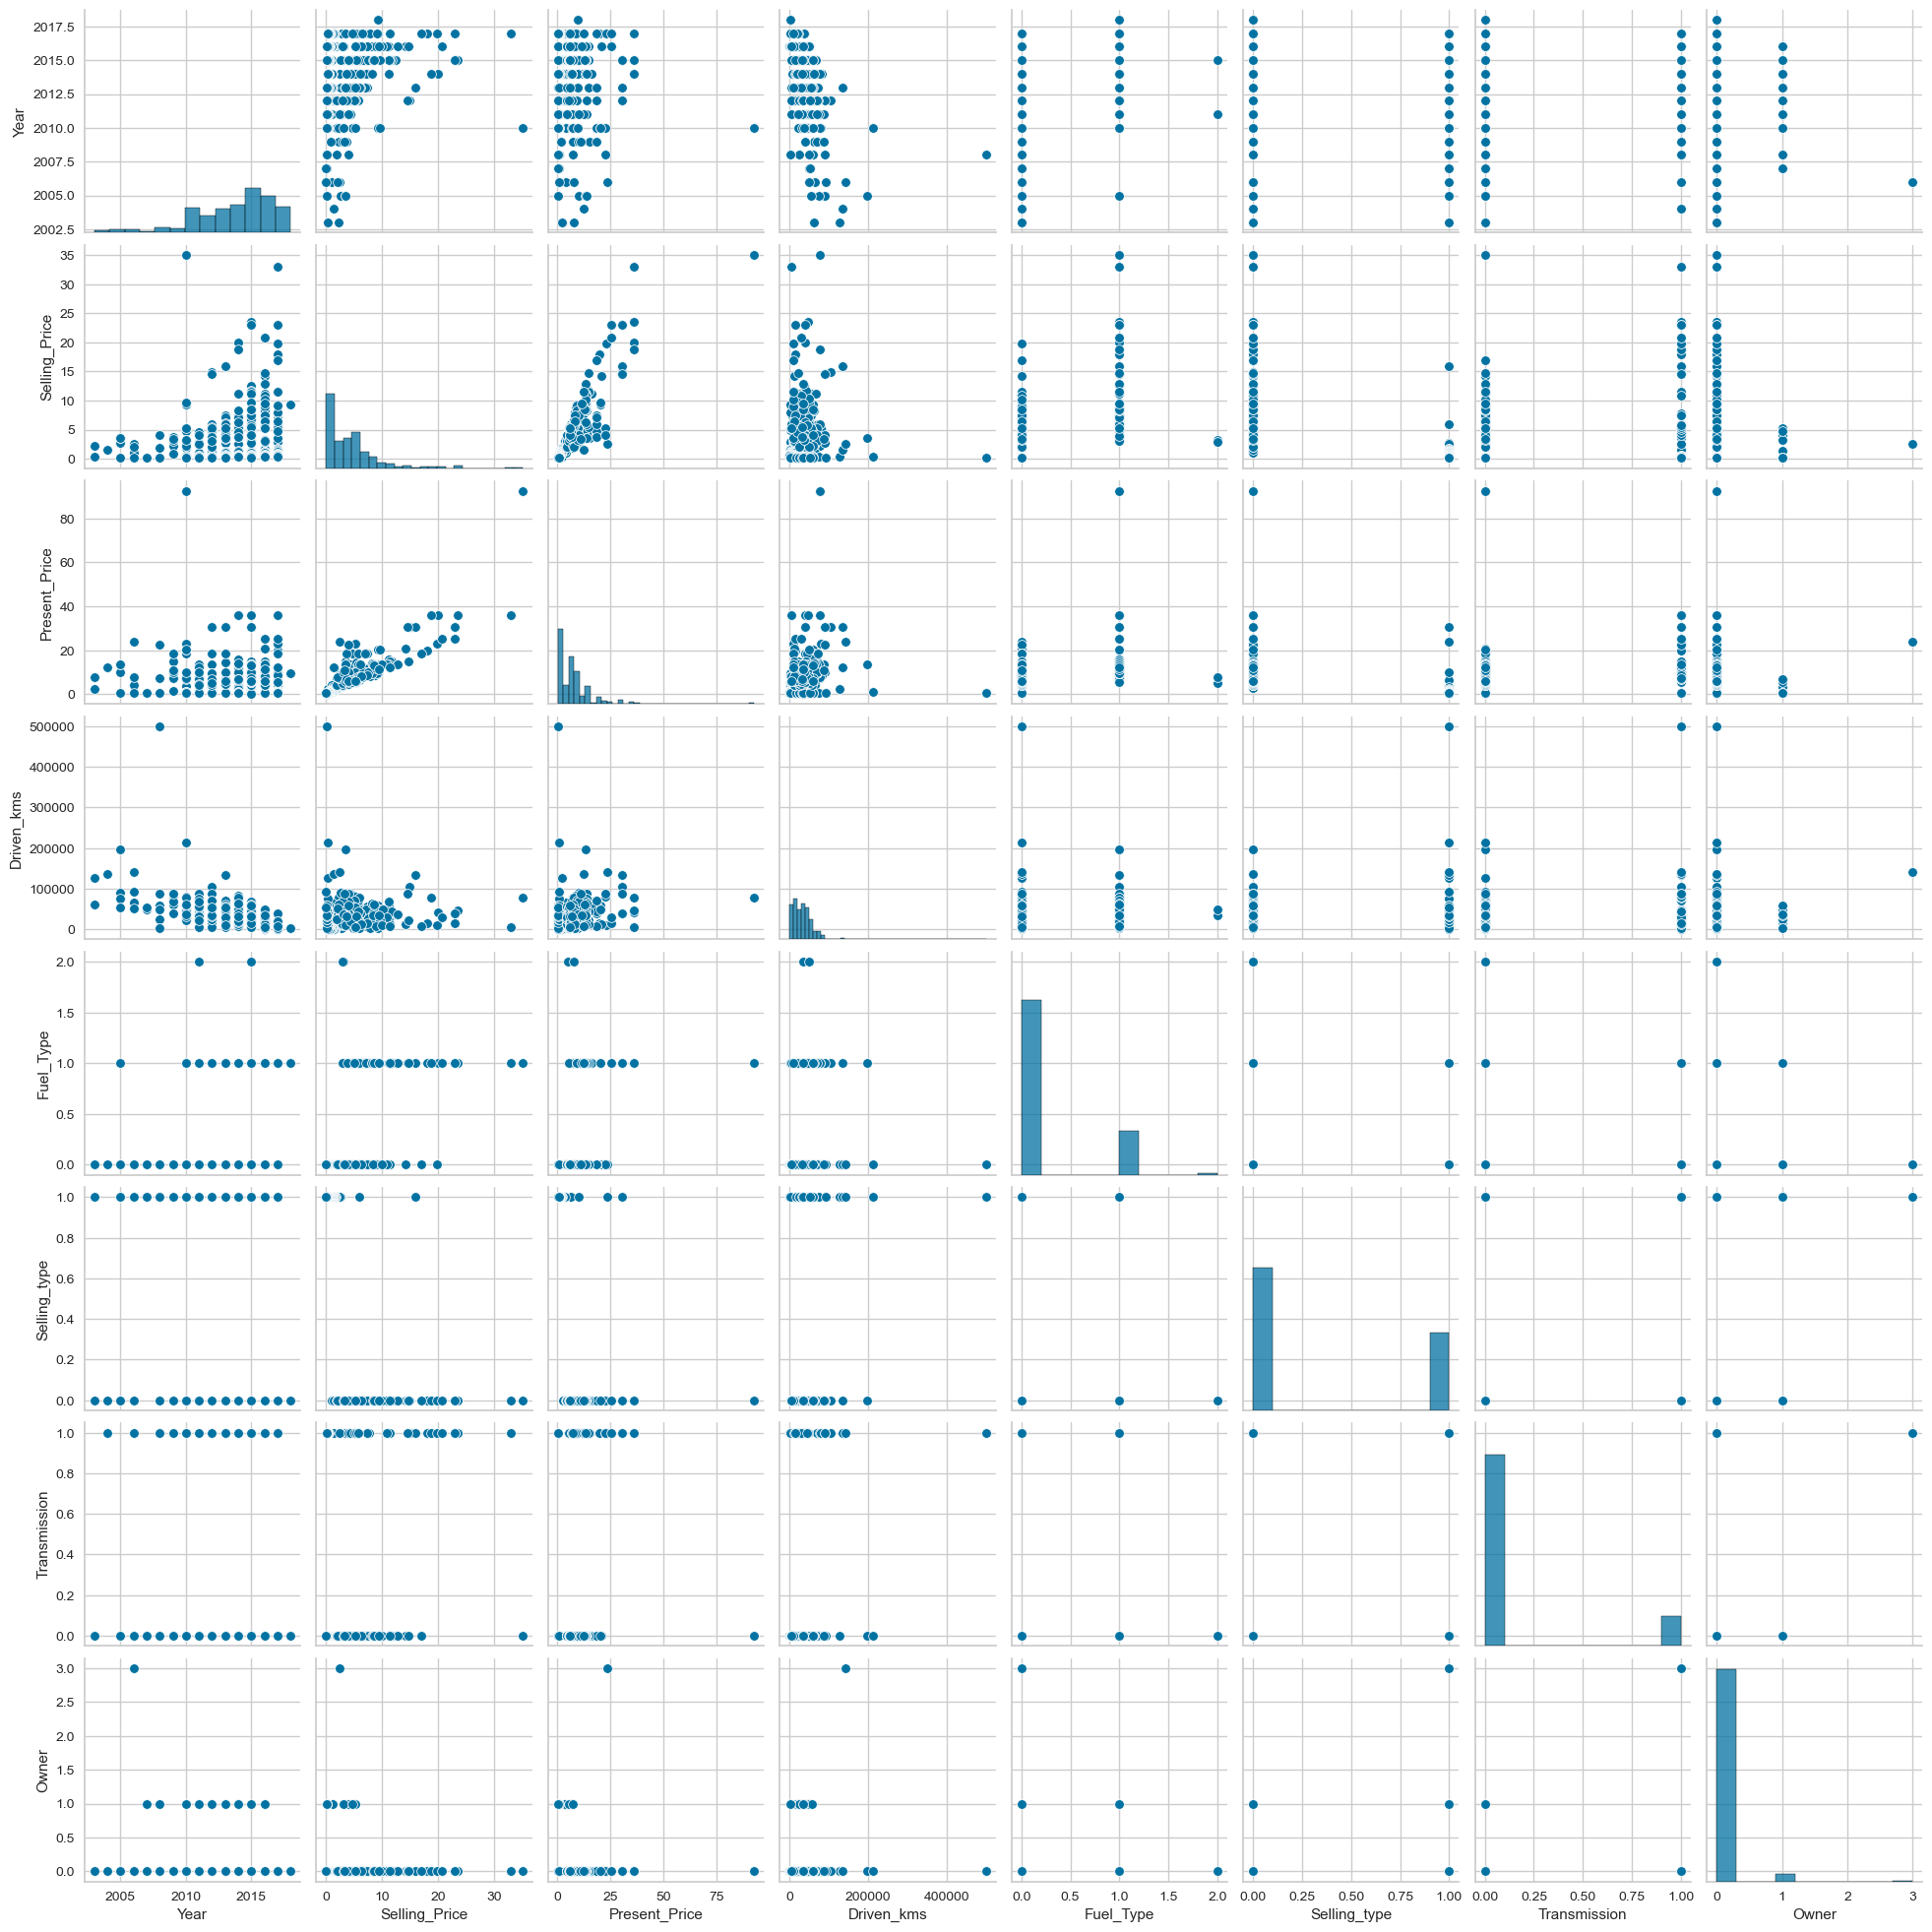

In [250]:
plt.figure(figsize=(50, 38))
sns.pairplot(cars_df, palette='cubehelix')
plt.show()

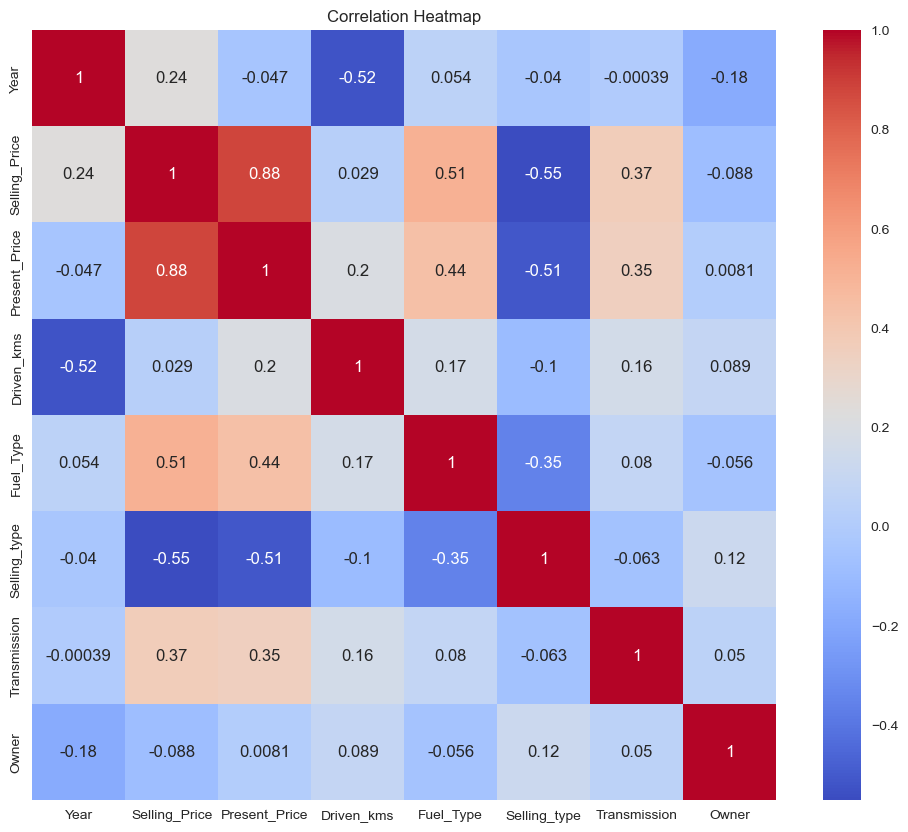

In [252]:
# Selecting only the numeric columns
numeric_cols = car_df.select_dtypes(include=['float64', 'int64'])

# Generating the correlation matrix
correlation_matrix = numeric_cols.corr()

# Creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Checking for outliers 

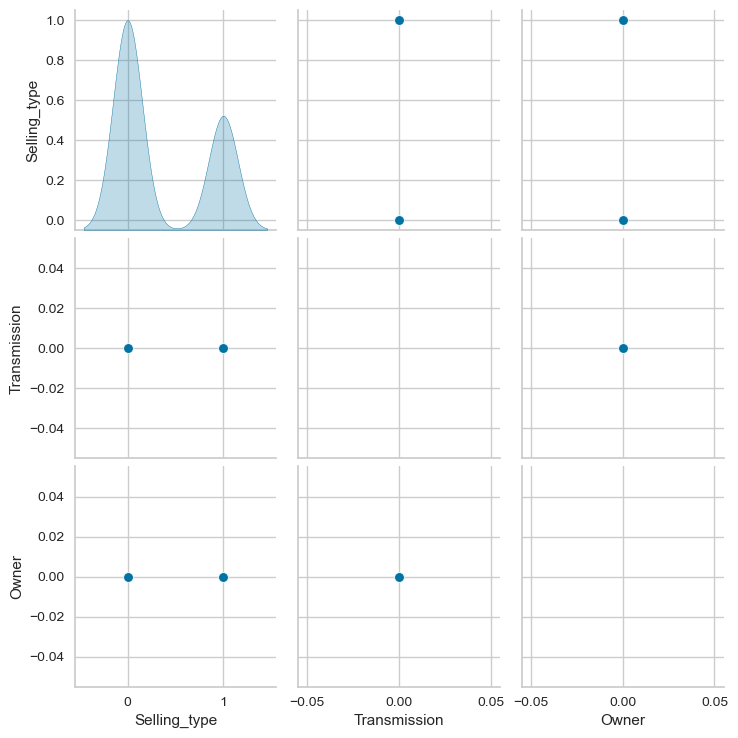

In [259]:
sns.pairplot(car_df.iloc[:, 6:], diag_kind='kde', palette='purple')
plt.show()


In [260]:
def Outlier(var):
    for x in var.iloc[:, 6:].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_car = Outlier(car_df)

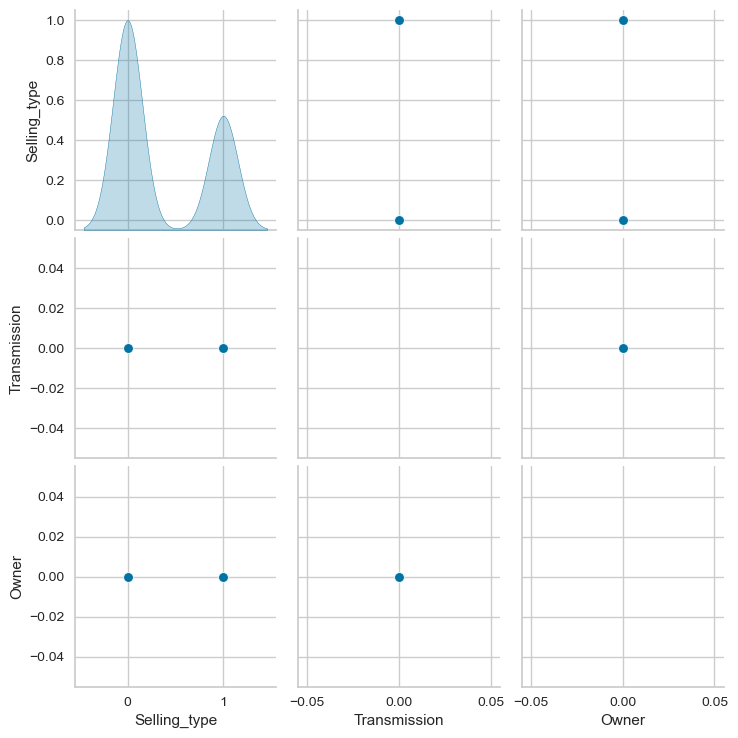

In [261]:
sns.pairplot(df_car.iloc[:, 6:], diag_kind='kde', palette='pink')
plt.show()

In [262]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


### Train Test Spliit :

In [265]:
X = df_car.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = df_car['Selling_Price']


In [266]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [267]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [268]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [269]:
#checking the shape after train-test split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 7)
(91, 7)
(210,)
(91,)


### Feature Selection :

In [270]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, Y)

selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)


Total Features Selected are 1
Threshold set by Model: 0.14
Important Features: ['Present_Price']


### Feature Importance :

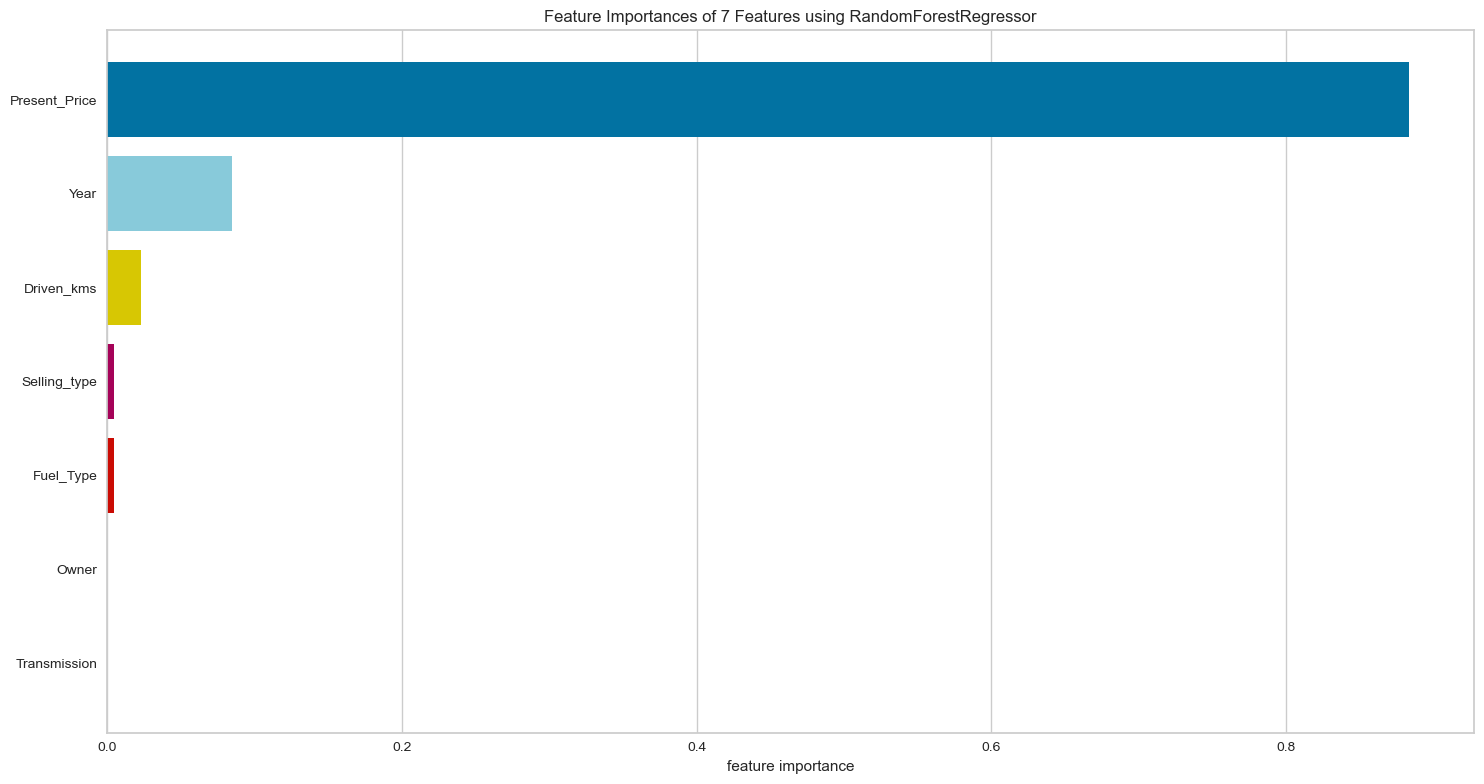

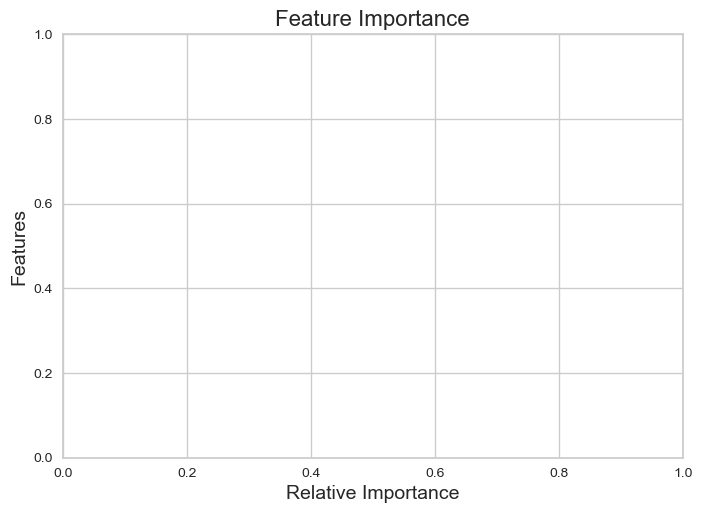

In [271]:
from yellowbrick.model_selection import FeatureImportances 

# Assuming X and Y represent your feature matrix and target variable respectively

figure = plt.figure(figsize=[15, 8])

# Initialize the FeatureImportances visualizer
viz = FeatureImportances(selector.estimator, relative=False)

# Fit the visualizer on your data
viz.fit(X, Y)

# Finalize the plot
viz.show()

# Add labels and title
plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importance', size=16)

plt.show()


###  Data Standardization :

In [272]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###  Modelling :

In [273]:
from sklearn import metrics

### Linear Regression :

In [274]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

**Model Evaluation :**

In [275]:
#Predicting on train data
y_pred_lin_train = lin_reg.predict(x_train)

#Predicting on test data
y_pred_lin_test = lin_reg.predict(x_test)

In [276]:
#R2 score on train dataset
R2_score_Linear_train = metrics.r2_score(y_train, y_pred_lin_train)
R2_score_Linear_train

0.8774016086645584

In [277]:
#R2 score on test dataset
R2_score_Linear_test = metrics.r2_score(y_test, y_pred_lin_test)
R2_score_Linear_test

0.8398273936750302

### Decision Tree Regressor :

In [278]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

**Model Evaluation :**

In [279]:
#Predicting on train data
y_pred_dtree_train = dtree.predict(x_train)

#Predicting on test data
y_pred_dtree_test = dtree.predict(x_test)

In [280]:
#R2 score on train dataset
R2_score_dtree_train = metrics.r2_score(y_train, y_pred_dtree_train)
R2_score_dtree_train

1.0

In [281]:
#R2 score on test dataset
R2_score_dtree_test = metrics.r2_score(y_test, y_pred_dtree_test)
R2_score_dtree_test

0.9074633770170895

### Random Forest Regressor :

In [282]:
from sklearn.ensemble import RandomForestRegressor

clf_rand = RandomForestRegressor()
clf_rand.fit(x_train, y_train)

RandomForestRegressor()

**Model Evaluation :**

In [283]:
#Predicting on train data
y_pred_rf_train = clf_rand.predict(x_train)

#Predicting on test data
y_pred_rf_test = clf_rand.predict(x_test)

In [284]:
#R2 score on train dataset
R2_score_rf_train = metrics.r2_score(y_train, y_pred_rf_train)
R2_score_rf_train

0.9885467202282346

In [285]:
#R2 score on test dataset
R2_score_rf_test = metrics.r2_score(y_test, y_pred_rf_test)
R2_score_rf_test

0.9139360730316507

### KNeighbors :

In [286]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

**Model Evaluation :**

In [287]:
#Predicting on train data
y_pred_kn_train = knn.predict(x_train)

#Predicting on test data
y_pred_kn_test = knn.predict(x_test)

In [288]:
#R2 score on train dataset
R2_score_Knn_train = metrics.r2_score(y_train, y_pred_kn_train)
R2_score_Knn_train

0.9508647485351017

In [289]:
#R2 score on test dataset
R2_score_Knn_test = metrics.r2_score(y_test, y_pred_kn_test)
R2_score_Knn_test

0.8903571439696227

### Ada Boost Regressor :

In [291]:
from sklearn.ensemble import AdaBoostRegressor

ada_tree = AdaBoostRegressor(base_estimator = dtree)
ada_tree.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

**Model Evaluation :**

In [292]:
#Predicting on train data
y_pred_ada_train = ada_tree.predict(x_train)

#Predicting on test data
y_pred_ada_test = ada_tree.predict(x_test)

In [293]:
#R2 score on train dataset
R2_score_adaTree_train = metrics.r2_score(y_train, y_pred_ada_train)
R2_score_adaTree_train

0.9996289485962843

In [294]:
#R2 score on test dataset
R2_score_adaTree_test = metrics.r2_score(y_test, y_pred_ada_test)
R2_score_adaTree_test

0.9243099405955425

### Bagging Regressor :

In [295]:
clf_bag = RandomForestRegressor()

In [296]:
from sklearn.ensemble import BaggingRegressor

bag_clf = BaggingRegressor(base_estimator = clf_bag)
bag_clf.fit(x_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor())

**Model Evaluation :**

In [297]:
#Predicting on train data
y_pred_bag_train = bag_clf.predict(x_train)

#Predicting on test data
y_pred_bag_test = bag_clf.predict(x_test)

In [298]:
#R2 score on train dataset
R2_score_bag_train = metrics.r2_score(y_train, y_pred_bag_train)
R2_score_bag_train

0.9530991952448981

In [299]:
#R2 score on test dataset
R2_score_bag_test = metrics.r2_score(y_test, y_pred_bag_test)
R2_score_bag_test

0.8983382501373226

### XGBRegressor :

In [300]:
import xgboost as xgb

xgb_cl = xgb.XGBRegressor()
xgb_cl.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Model Evaluation :**

In [301]:
#Predicting on train data
y_pred_xg_train = xgb_cl.predict(x_train)

#Predicting on test data
y_pred_xg_test = xgb_cl.predict(x_test)

In [302]:
#R2 score on train dataset
R2_score_xg_train = metrics.r2_score(y_train, y_pred_xg_train)
R2_score_xg_train

0.9999980336461584

In [303]:
#R2 score on test dataset
R2_score_xg_test = metrics.r2_score(y_test, y_pred_xg_test)
R2_score_xg_test

0.8979876794310528

In [304]:
models = pd.DataFrame({ 'Model': ['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor','Bagging Regressor', 'KNeighbors', 'XGBoost Regressor'],
                       'Training R2_Score': [R2_score_Linear_train, R2_score_dtree_train, R2_score_adaTree_train,
                                         R2_score_rf_train, R2_score_bag_train,R2_score_Knn_train,
                                            R2_score_xg_train],
                       
                       'Testing R2_Score': [R2_score_Linear_test, R2_score_dtree_test, R2_score_adaTree_test, R2_score_rf_test, R2_score_bag_test,
                                        R2_score_Knn_test, R2_score_xg_test]})
models.sort_values(by = ['Training R2_Score', 'Testing R2_Score'], ascending = False, ignore_index = True)

,Model,Training R2_Score,Testing R2_Score
0,Decision Tree Regressor,1.000000,0.907463
1,XGBoost Regressor,0.999998,0.897988
2,ADABoost Regressor,0.999629,0.924310
3,Random Forest Regressor,0.988547,0.913936
4,Bagging Regressor,0.953099,0.898338
5,KNeighbors,0.950865,0.890357
6,Linear Regressor,0.877402,0.839827


### Kfold Cross Validation :

In [305]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [306]:
Regressors = []

Regressors.append(LinearRegression())
Regressors.append(DecisionTreeRegressor())
Regressors.append(AdaBoostRegressor())
Regressors.append(RandomForestRegressor())
Regressors.append(BaggingRegressor(base_estimator = clf_bag))
Regressors.append(KNeighborsRegressor(n_neighbors= 3))
Regressors.append(xgb.XGBRegressor())

In [307]:
cv_results = []

for Regressor in Regressors:
    cv_results.append(cross_val_score(Regressor, x_train, y_train, scoring = 'r2', cv = 5))

In [308]:
cv_results

[array([0.80727473, 0.89150816, 0.80979509, 0.62307918, 0.86686697]),
 array([ 0.95563351,  0.76426879, -0.21389369,  0.94444706,  0.91794192]),
 array([0.93232284, 0.75037206, 0.76368933, 0.90623235, 0.84155087]),
 array([0.96983021, 0.80322891, 0.66026141, 0.93990378, 0.95682943]),
 array([0.95530259, 0.80965392, 0.60488452, 0.89080287, 0.96078818]),
 array([0.92150391, 0.84380564, 0.96118841, 0.9645483 , 0.91000881]),
 array([0.96602645, 0.7695463 , 0.93573596, 0.96670444, 0.95897581])]

In [309]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [310]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor', 'Bagging Regressor', 'KNeighbors', 'XGBoost Regressor']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.920211,0.043792,KNeighbors
1,0.919398,0.075764,XGBoost Regressor
2,0.866011,0.118963,Random Forest Regressor
3,0.844286,0.131585,Bagging Regressor
4,0.838833,0.073161,ADABoost Regressor
5,0.799705,0.094122,Linear Regressor
6,0.673680,0.449104,Decision Tree Regressor


### Tuning on Random Forest Regressor :

In [311]:
from sklearn.model_selection import GridSearchCV

In [312]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [313]:
rf = RandomForestRegressor()

In [314]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [315]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [316]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [317]:
rf = RandomForestRegressor(max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt')

In [318]:
#Predicting on train data
y_pred_rfg_train = rf.predict(x_train)

#Predicting on test data
y_pred_rfg_test = rf.predict(x_test)

In [319]:
#R2 score on train dataset
R2_score_rfg_train = metrics.r2_score(y_train, y_pred_rfg_train)
R2_score_rfg_train

0.9827982105916144

In [320]:
#R2 score on test dataset
R2_score_rfg_test = metrics.r2_score(y_test, y_pred_rfg_test)
R2_score_rfg_test

0.8621179127427764

**After tuning the Random Forest model using GridSearchCV, the R2 score for the test set stands at 0.86**.

***Thank You***